In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

In [2]:
train = pd.read_csv("C:\\Users\\Moaz\\Desktop\\moaz\\Jupyter Python NB\\Machine Hack Practice\\Beer Train Data Set.csv")
test = pd.read_csv("C:\\Users\\Moaz\\Desktop\\moaz\\Jupyter Python NB\\Machine Hack Practice\\Beer Test Data Set.csv")

In [3]:
train.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,40-45,45-50,3.28
1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),35-40,40-45,3.52
2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,35-40,40-45,4.01
3,NaN,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,0.00
4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,35-40,40-45,2.73


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185643 entries, 0 to 185642
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ABV                  170513 non-null  float64
 1   Brewing Company      185643 non-null  int64  
 2   Food Paring          185643 non-null  object 
 3   Glassware Used       185643 non-null  object 
 4   Beer Name            185643 non-null  int64  
 5   Ratings              185643 non-null  object 
 6   Style Name           185643 non-null  object 
 7   Cellar Temperature   178862 non-null  object 
 8   Serving Temperature  185450 non-null  object 
 9   Score                185643 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 14.2+ MB


In [5]:
train.isnull().sum()

ABV                    15130
Brewing Company            0
Food Paring                0
Glassware Used             0
Beer Name                  0
Ratings                    0
Style Name                 0
Cellar Temperature      6781
Serving Temperature      193
Score                      0
dtype: int64

In [6]:
train[["Minimum Temperature", "Maximum Temperature"]]=train["Cellar Temperature"].str.split("-", expand=True, n=1).astype(float)

In [7]:
train[["Minimum Serving Temperature", "Maximum Serving Temperature"]]=train["Serving Temperature"].str.split("-", expand=True, n=1).astype(float)

In [8]:
# Filling empty vaues with MEAN value
avg_abv = train["ABV"].astype("float").mean(axis=0)
train["ABV"].replace(np.nan, avg_abv, inplace=True)

avg_min_temp = train["Minimum Temperature"].astype("float").mean(axis=0)
train["Minimum Temperature"].replace(np.nan, avg_min_temp, inplace=True)

avg_min_temp = train["Maximum Temperature"].astype("float").mean(axis=0)
train["Maximum Temperature"].replace(np.nan, avg_min_temp, inplace=True)

avg_minserv_temp = train["Minimum Serving Temperature"].astype("float").mean(axis=0)
train["Minimum Serving Temperature"].replace(np.nan, avg_minserv_temp, inplace=True)

avg_minserv_temp = train["Maximum Serving Temperature"].astype("float").mean(axis=0)
train["Maximum Serving Temperature"].replace(np.nan, avg_minserv_temp, inplace=True)

In [9]:
train.isnull().sum()

ABV                               0
Brewing Company                   0
Food Paring                       0
Glassware Used                    0
Beer Name                         0
Ratings                           0
Style Name                        0
Cellar Temperature             6781
Serving Temperature             193
Score                             0
Minimum Temperature               0
Maximum Temperature               0
Minimum Serving Temperature       0
Maximum Serving Temperature       0
dtype: int64

In [10]:
freq = nltk.FreqDist(train['Food Paring'])
for key,value in freq.items():
    print(str(key)+'  :  '+str(value))

(Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Poultry,Fish,Shellfish,Salmon)  :  25577
(PanAsian)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,tangyBrick,Edam,Feta)General(Salad)Meat(Poultry)  :  12648
Meat(Pork,Poultry)  :  1280
(Indian,LatinAmerican,PanAsian)General(Aperitif)  :  247
Meat(Poultry,Fish,Shellfish)  :  2444
(Italian,German)Cheese(nuttyAsiago,Colby,Parmesan)Meat(Fish,Shellfish,Salmon)  :  816
Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan)Meat(Pork,GrilledMeat)  :  1301
Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Chocolate,Digestive)Meat(Beef,SmokedMeat,Game,GrilledMeat)  :  5125
(Barbecue,Indian,LatinAmerican,Thai,PanAsian)Cheese(pepperyMontereyPepperJack)Meat(Shellfish)  :  1064
(Barbecue)Cheese(sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Beef,GrilledMeat)  :  1229
(Curried,Thai)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,pungentGorgonzola,Limburger)General(Salad,Aperitif

In [11]:
train['Food Paring'] = train['Food Paring'].replace("(Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Poultry,Fish,Shellfish,Salmon)" , "Thai, Cheese, Meat"  )
train['Food Paring'] = train['Food Paring'].replace("(PanAsian)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,tangyBrick,Edam,Feta)General(Salad)Meat(Poultry)" , "Pan-Asian, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("Meat(Pork,Poultry)" , "Meat")
train['Food Paring'] = train['Food Paring'].replace("(Indian,LatinAmerican,PanAsian)General(Aperitif)" , "Indian, Latin-American, Pan-Asian, General Food")
train['Food Paring'] = train['Food Paring'].replace("Meat(Poultry,Fish,Shellfish)" , "Meat")
train['Food Paring'] = train['Food Paring'].replace("(Italian,German)Cheese(nuttyAsiago,Colby,Parmesan)Meat(Fish,Shellfish,Salmon)" , "Italian, German, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan)Meat(Pork,GrilledMeat)" , "Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Chocolate,Digestive)Meat(Beef,SmokedMeat,Game,GrilledMeat)" , "Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue,Indian,LatinAmerican,Thai,PanAsian)Cheese(pepperyMontereyPepperJack)Meat(Shellfish)" , "Barbecue, Indian, Latin-American, Thai, Pan-Asian, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue)Cheese(sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Beef,GrilledMeat)" , "Barbecue, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Curried,Thai)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,pungentGorgonzola,Limburger)General(Salad,Aperitif)Meat(Poultry,Fish,Shellfish)" , "Thai, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Salad)" , "General Food")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue,Curried,Indian,LatinAmerican,Italian,Thai,Chinese,Japanese,PanAsian,Mediterranean,MiddleEastern)" , "Barbecue, Indian, Latin-American, Italian, Thai, Japanese, Pan-Asian, Mediterranean, Middle-East")
train['Food Paring'] = train['Food Paring'].replace("Cheese(tangyBrick,Edam,Feta)" , "Cheese")
train['Food Paring'] = train['Food Paring'].replace("Cheese(sharpBlue,Cheddar)Meat(Beef,Poultry,Fish)" , "Cheese")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue,German)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar)Meat(Beef,SmokedMeat,Game,GrilledMeat,Salmon)" , "Barbecue, German, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(butteryBrie,Gouda,Havarti,Swiss)Meat(SmokedMeat,Salmon)" , "Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(pepperyMontereyPepperJack,pungentGorgonzola,Limburger)General(Salad)" , "Cheese, General Food")
train['Food Paring'] = train['Food Paring'].replace("(German)General(Chocolate,Dessert)Meat(GrilledMeat)" , "German, General Food")
train['Food Paring'] = train['Food Paring'].replace("(Curried,Indian)Cheese(nuttyAsiago,Colby,Parmesan,sharpBlue,Cheddar)Meat(Shellfish)" , "Indian, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue,LatinAmerican)Cheese(earthyCamembert,Fontina)General(Chocolate,Dessert)Meat(Beef,Shellfish,SmokedMeat,GrilledMeat)" , "Barbecue, Latin-American, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(German)" , "German")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar)Meat(Beef,SmokedMeat,Game,GrilledMeat,Salmon)" , "Barbecue, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(sharpBlue,Cheddar,pungentGorgonzola,Limburger)General(Digestive)" , "Cheese, General Food")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue,Italian)Cheese(earthyCamembert,Fontina)Meat(Pork,Poultry,Fish,Shellfish)" , "Barbecue, Italian, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Curried)Cheese(nuttyAsiago,Colby,Parmesan,pepperyMontereyPepperJack)Meat(Poultry,Fish)" , "Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("(German)Cheese(tangyBrick,Edam,Feta)General(Salad)Meat(Poultry,Fish,Shellfish)" , "German, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(butteryBrie,Gouda,Havarti,Swiss,pungentGorgonzola,Limburger)General(Chocolate)Meat(Beef)" , "Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Chocolate,Dessert)Meat(Beef,SmokedMeat,GrilledMeat)" , "Barbecue, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Thai)Cheese(tangyBrick,Edam,Feta)General(Salad,Aperitif)Meat(Fish)" , "Thai, Cheese, General Food, Meat")



In [12]:
train['Food Paring'] = train['Food Paring'].replace("(LatinAmerican,German)Meat(Pork,Poultry)" , "Latin-American, German, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swiss,earthyCamembert,Fontina)General(Chocolate,Dessert)Meat(Beef,Shellfish,SmokedMeat,Game,GrilledMeat)" , "Barbecue, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(butteryBrie,Gouda,Havarti,Swiss,sharpBlue,Cheddar)General(Digestive)Meat(Beef,SmokedMeat,Game)" , "Cheese, General Food")
train['Food Paring'] = train['Food Paring'].replace("(Dessert,Aperitif,Digestive)" , "Dessert")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Game,GrilledMeat,Salmon)" , "Barbecue, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("(German)Cheese(butteryBrie,Gouda,Havarti,Swiss,sharpBlue,Cheddar)General(Salad,Aperitif)" , "German, Cheese, General Food")
train['Food Paring'] = train['Food Paring'].replace("(German)Cheese(butteryBrie,Gouda,Havarti,Swiss,earthyCamembert,Fontina)General(Chocolate)Meat(Game)" , "German, Cheese, General Food")
train['Food Paring'] = train['Food Paring'].replace("(Aperitif,Digestive)Meat(Game,Salmon)" , "Dessert, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan)General(Chocolate)Meat(Beef)" , "Barbecue, Cheese, General Food")
train['Food Paring'] = train['Food Paring'].replace("(Indian,MiddleEastern)Cheese(nuttyAsiago,Colby,Parmesan,tangyBrick,Edam,Feta)General(Salad,Aperitif)Meat(Fish,Shellfish)" , "Indian, Middle-East, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(German)Cheese(earthyCamembert,Fontina)General(Chocolate)Meat(Game)" , "German, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(pepperyMontereyPepperJack,tangyBrick,Edam,Feta)General(Salad)Meat(Poultry,Fish,Shellfish)" , "Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue,LatinAmerican)General(Chocolate)Meat(SmokedMeat,GrilledMeat)" , "Barbecue, Latin-American, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(German)Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Salad)Meat(Pork,Fish,Shellfish)" , "German, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Dessert)Meat(Poultry)" , "Dessert, Meat")
train['Food Paring'] = train['Food Paring'].replace("(German)General(Salad)Meat(Fish)" , "German, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("None,yet" , "None yet")
train['Food Paring'] = train['Food Paring'].replace("(Mediterranean)Cheese(sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Pork,Poultry)" , "Mediterranean, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue,Curried,Indian,LatinAmerican,Chinese)Cheese(sharpBlue,Cheddar)General(Aperitif,Digestive)Meat(Shellfish,Game)" , "Barbecue, Indian, Latin-American, Chinese, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(German)Cheese(pepperyMontereyPepperJack)General(Salad)Meat(Pork)" , "German, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Italian,MiddleEastern)Cheese(pepperyMontereyPepperJack)General(Salad)Meat(Fish)" , "Italian, Middle-East, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Japanese,German)Cheese(pepperyMontereyPepperJack)General(Aperitif)Meat(Poultry,Fish)" , "Japanese, German, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(LatinAmerican,German)Meat(Beef,SmokedMeat,GrilledMeat)" , "Latin-American, German, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Chocolate,Salad,Dessert,Aperitif)" , "Dessert")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue)Cheese(earthyCamembert,Fontina)Meat(Beef,SmokedMeat,Game,GrilledMeat)" , "Barbecue, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("(German)General(Salad)Meat(Pork,Fish,Shellfish)" , "German, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(German)Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Aperitif)Meat(Pork,Poultry,Fish,Shellfish)" , "German, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(earthyCamembert,Fontina,sharpBlue,Cheddar)Meat(GrilledMeat)" , "Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Curried,Indian,Thai,Chinese,Japanese,PanAsian)Cheese(sharpBlue,Cheddar)" , "Indian, Thai, Chinese, Japanese, Pan-Aisan, Cheese")
train['Food Paring'] = train['Food Paring'].replace("Cheese(sharpBlue,Cheddar,pungentGorgonzola,Limburger)General(Dessert,Digestive)" , "Cheese, General Food")



In [13]:
train['Food Paring'] = train['Food Paring'].replace("(LatinAmerican)Meat(Beef,Poultry)" , "Latin-American, Meat")
train['Food Paring'] = train['Food Paring'].replace("(German)Meat(SmokedMeat,Game,GrilledMeat)" , "German, Meat ")
train['Food Paring'] = train['Food Paring'].replace("Cheese(nuttyAsiago,Colby,Parmesan)General(Digestive)" , "Cheese, General Food")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,tangyBrick,Edam,Feta)General(Salad)Meat(Pork,Poultry,Fish,Shellfish)" , "Barbecue, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Indian,Mediterranean,MiddleEastern)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar)Meat(Fish,Shellfish)" , "Indian, Mediterranean, Middle-East, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(sharpBlue,Cheddar,pungentGorgonzola,Limburger,tangyBrick,Edam,Feta)General(Salad)" , "Cheese, General")
train['Food Paring'] = train['Food Paring'].replace("(German)Cheese(earthyCamembert,Fontina)Meat(SmokedMeat,Game,GrilledMeat)" , "German, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(earthyCamembert,Fontina)General(Chocolate)Meat(GrilledMeat)" , "Cheese, General Food")
train['Food Paring'] = train['Food Paring'].replace("Cheese(sharpBlue,Cheddar,tangyBrick,Edam,Feta)General(Aperitif,Digestive)" , "Cheese, General Food")
train['Food Paring'] = train['Food Paring'].replace("Cheese(pepperyMontereyPepperJack)General(Chocolate)Meat(GrilledMeat)" , "Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Curried,German)Cheese(nuttyAsiago,Colby,Parmesan)General(Digestive)Meat(Salmon)" , "German, Cheese, General Food")
train['Food Paring'] = train['Food Paring'].replace("(German)Cheese(butteryBrie,Gouda,Havarti,Swiss,sharpBlue,Cheddar)General(Dessert,Digestive)" , "German, Cheese, General Food")
train['Food Paring'] = train['Food Paring'].replace("Cheese(earthyCamembert,Fontina)General(Aperitif)" , "Cheese, General Food")
train['Food Paring'] = train['Food Paring'].replace("(German)General(Salad)Meat(Poultry,Fish)" , "German, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Japanese)" , "Japanese")
train['Food Paring'] = train['Food Paring'].replace("(German)Cheese(sharpBlue,Cheddar)General(Salad)Meat(Pork)" , "German, Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(pungentGorgonzola,Limburger,tangyBrick,Edam,Feta)General(Digestive)Meat(Shellfish,Game,GrilledMeat)" , "Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue,LatinAmerican)Cheese(pepperyMontereyPepperJack)Meat(Fish,SmokedMeat)" , "Barbecue, Latin-American, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Salad)Meat(Poultry,Game)" , "General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Curried,Thai,PanAsian)Cheese(sharpBlue,Cheddar)Meat(Game,GrilledMeat)" , "Thai, Cheese, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(butteryBrie,Gouda,Havarti,Swiss,pungentGorgonzola,Limburger)General(Dessert,Digestive)Meat(Game)" , "Cheese, General Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(butteryBrie,Gouda,Havarti,Swiss,sharpBlue,Cheddar,pungentGorgonzola,Limburger)" , "Cheese")
train['Food Paring'] = train['Food Paring'].replace("(Aperitif)Meat(Fish,Shellfish,Salmon)" , "Dessert, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Thai,Chinese,Japanese,PanAsian)Meat(Pork,Poultry,Fish,Shellfish)" , "Thai, Chinese, Japanese, Pan-Asian, Meat")
train['Food Paring'] = train['Food Paring'].replace("(Barbecue,LatinAmerican)Cheese(nuttyAsiago,Colby,Parmesan)General(Chocolate)Meat(Salmon)" , "Barbecue, Latin-American, Geberal Food, Meat")
train['Food Paring'] = train['Food Paring'].replace("Cheese(sharpBlue,Cheddar,pungentGorgonzola,Limburger)General(Aperitif,Digestive)" , "Cheese, General Food")
train['Food Paring'] = train['Food Paring'].replace("(Dessert,Aperitif)" , "Dessert")
train['Food Paring'] = train['Food Paring'].replace("(Chocolate,Salad,Dessert,Apritif)" , "Dessert")


In [14]:
train['Food Paring'].nunique()

46

In [15]:
freq = nltk.FreqDist(train['Glassware Used'])
for key,value in freq.items():
    print(str(key)+'  :  '+str(value))

PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)  :  91275
PintGlass(orBecker,Nonic,Tumbler),PilsenerGlass(orPokal),Mug(orSeidel,Stein)  :  5217
PilsenerGlass(orPokal)  :  5758
Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)  :  4689
PintGlass(orBecker,Nonic,Tumbler),Snifter,OversizedWineGlass  :  5807
PintGlass(orBecker,Nonic,Tumbler),PilsenerGlass(orPokal)  :  1560
Snifter,Tulip,Goblet(orChalice),OversizedWineGlass  :  1229
PintGlass(orBecker,Nonic,Tumbler),Tulip,OversizedWineGlass  :  8982
Mug(orSeidel,Stein),Stange(SlenderCylinder)  :  394
PintGlass(orBecker,Nonic,Tumbler),Snifter,Tulip  :  1379
Flute,Tulip,OversizedWineGlass  :  5523
Flute,WeizenGlass  :  517
Flute,PilsenerGlass(orPokal)  :  4254
PintGlass(orBecker,Nonic,Tumbler)  :  3888
WeizenGlass  :  4748
Goblet(orChalice)  :  1283
Snifter,Tulip,OversizedWineGlass  :  15135
Snifter,Tulip,Goblet(orChalice)  :  774
Mug(orSeidel,Stein)  :  918
PintGlass(orBecker,Nonic,Tumbler),Goblet(orChalice)  :  2376
PilsenerGlass(orPoka

In [16]:
train['Glassware Used'] = train['Glassware Used'].replace('PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)','Pint Glass, Mug')
train['Glassware Used'] = train['Glassware Used'].replace('PintGlass(orBecker,Nonic,Tumbler),PilsenerGlass(orPokal),Mug(orSeidel,Stein)','Pint Glass, Pilsener Glass, Mug')
train['Glassware Used'] = train['Glassware Used'].replace('PilsenerGlass(orPokal)','Pilsener Glass')
train['Glassware Used'] = train['Glassware Used'].replace('Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)','Flute, Pint Glass, Mug')
train['Glassware Used'] = train['Glassware Used'].replace('PintGlass(orBecker,Nonic,Tumbler),Snifter,OversizedWineGlass','Pint Glass, Snifter, Over-sized Wine Glass')
train['Glassware Used'] = train['Glassware Used'].replace('PintGlass(orBecker,Nonic,Tumbler),PilsenerGlass(orPokal)','Pint Glass, Pilsener Glass')
train['Glassware Used'] = train['Glassware Used'].replace('Snifter,Tulip,Goblet(orChalice),OversizedWineGlass','Snifter, Tulip, Goblet, Over-sized Wine Glass')
train['Glassware Used'] = train['Glassware Used'].replace('PintGlass(orBecker,Nonic,Tumbler),Tulip,OversizedWineGlass','Pint Glass, Tulip, Over-sized Wine Glass')
train['Glassware Used'] = train['Glassware Used'].replace('Mug(orSeidel,Stein),Stange(SlenderCylinder)','Mug, Stange')
train['Glassware Used'] = train['Glassware Used'].replace('PintGlass(orBecker,Nonic,Tumbler),Snifter,Tulip','Pint Glass, Nonic, Tumbler')
train['Glassware Used'] = train['Glassware Used'].replace('Flute,Tulip,OversizedWineGlass','Flute, Tulip, Over-sized Wine Glass')
train['Glassware Used'] = train['Glassware Used'].replace('Flute,WeizenGlass','Flute, Weizen Glass')
train['Glassware Used'] = train['Glassware Used'].replace('Flute,PilsenerGlass(orPokal)','Flute, Pilsener Glass')
train['Glassware Used'] = train['Glassware Used'].replace('PintGlass(orBecker,Nonic,Tumbler)','Pint Glass')
train['Glassware Used'] = train['Glassware Used'].replace('WeizenGlass','Weizen Glass')
train['Glassware Used'] = train['Glassware Used'].replace('Goblet(orChalice)','Goblet')
train['Glassware Used'] = train['Glassware Used'].replace('Snifter,Tulip,OversizedWineGlass','Snifter, Tulip, Over-sized Wine Glass')
train['Glassware Used'] = train['Glassware Used'].replace('Snifter,Tulip,Goblet(orChalice)','Snifter, Tulip, Goblet')
train['Glassware Used'] = train['Glassware Used'].replace('Mug(orSeidel,Stein)','Mug')
train['Glassware Used'] = train['Glassware Used'].replace('PintGlass(orBecker,Nonic,Tumbler),Goblet(orChalice)','Pint Glass, Goblet')
train['Glassware Used'] = train['Glassware Used'].replace('PilsenerGlass(orPokal),Mug(orSeidel,Stein)','Pilsener Glass, Mug')
train['Glassware Used'] = train['Glassware Used'].replace('Tulip,OversizedWineGlass','Tulip, Over-sized Wine Glass')
train['Glassware Used'] = train['Glassware Used'].replace('Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein),Stange(SlenderCylinder)','Flute, Mug, Stange')
train['Glassware Used'] = train['Glassware Used'].replace('Stange(SlenderCylinder),WeizenGlass','Stange, Weizen Glass')
train['Glassware Used'] = train['Glassware Used'].replace('Snifter,Goblet(orChalice)','Snifter, Goblet')
train['Glassware Used'] = train['Glassware Used'].replace('PintGlass(orBecker,Nonic,Tumbler),Stange(SlenderCylinder)','Pint Glass, Stange')
train['Glassware Used'] = train['Glassware Used'].replace('Flute,Snifter,Tulip,Stange(SlenderCylinder)','Flute, Snifter, Tulip, Stange ')
train['Glassware Used'] = train['Glassware Used'].replace('Stange(SlenderCylinder)','Stange ')
train['Glassware Used'] = train['Glassware Used'].replace('PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein),OversizedWineGlass','Pint Glass, Mug, Over-sized Wine Glass')
train['Glassware Used'] = train['Glassware Used'].replace('Flute,Snifter,Tulip','Flute, Snifter, Tulip ')
train['Glassware Used'] = train['Glassware Used'].replace('PintGlass(orBecker,Nonic,Tumbler),Snifter','Pint Glass, Snifter ')
train['Glassware Used'] = train['Glassware Used'].replace('PintGlass(orBecker,Nonic,Tumbler),Snifter,Mug(orSeidel,Stein)','Pint Glass, Snifter, Mug ')
train['Glassware Used'] = train['Glassware Used'].replace('Tulip,Goblet(orChalice),OversizedWineGlass','Tulip, Over-sized Wine Glass')
train['Glassware Used'] = train['Glassware Used'].replace('None,yet','None yet ')
train['Glassware Used'] = train['Glassware Used'].replace('Flute,Snifter,OversizedWineGlass','Flute, Snifter, Over-sized Wine Glass ')
train['Glassware Used'] = train['Glassware Used'].replace('Snifter,OversizedWineGlass','Snifter, Over-sized Wine Glass ')
train['Glassware Used'] = train['Glassware Used'].replace('Flute','Flute ')
train['Glassware Used'] = train['Glassware Used'].replace('PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein),WeizenGlass','Pint Glass, Mug, Weizen Glass ')
train['Glassware Used'] = train['Glassware Used'].replace('Flute,Stange(SlenderCylinder)','Flute, Stange ')



In [17]:
train['Glassware Used'].nunique()

38

In [18]:
train['Style Name'].nunique()

94

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [20]:
train['Food Paring label']= label_encoder.fit_transform(train['Food Paring']) 
train['Glassware Used label']= label_encoder.fit_transform(train['Glassware Used']) 
train['Style Name label']= label_encoder.fit_transform(train['Style Name']) 

In [21]:
train['Ratings'] = pd.to_numeric(train['Ratings'],errors='coerce')
train['Beer Name'] = train['Beer Name'].astype(float)
train['Brewing Company'] = train['Brewing Company'].astype(float)

In [22]:
train.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score,Minimum Temperature,Maximum Temperature,Minimum Serving Temperature,Maximum Serving Temperature,Food Paring label,Glassware Used label,Style Name label
0,6.500000,8929.0,"Thai, Cheese, Meat","Pint Glass, Mug",15121.0,22.0,AmericanIPA,40-45,45-50,3.28,40.0,45.0,45.0,50.0,44,18,12
1,5.500000,13187.0,"Pan-Asian, Cheese, General Food, Meat","Pint Glass, Mug",59817.0,1.0,AmericanPaleAle(APA),35-40,40-45,3.52,35.0,40.0,40.0,45.0,42,18,14
2,8.100000,6834.0,Meat,"Pint Glass, Mug",32669.0,3.0,IrishRedAle,35-40,40-45,4.01,35.0,40.0,40.0,45.0,39,18,63
3,6.354961,11688.0,"Indian, Latin-American, Pan-Asian, General Food","Pint Glass, Pilsener Glass, Mug",130798.0,0.0,AmericanMaltLiquor,35-40,35-40,0.00,35.0,40.0,35.0,40.0,29,23,13
4,6.000000,10417.0,Meat,Pilsener Glass,124087.0,1.0,EuroPaleLager,35-40,40-45,2.73,35.0,40.0,40.0,45.0,39,14,50


In [23]:
train.dtypes

ABV                            float64
Brewing Company                float64
Food Paring                     object
Glassware Used                  object
Beer Name                      float64
Ratings                        float64
Style Name                      object
Cellar Temperature              object
Serving Temperature             object
Score                          float64
Minimum Temperature            float64
Maximum Temperature            float64
Minimum Serving Temperature    float64
Maximum Serving Temperature    float64
Food Paring label                int32
Glassware Used label             int32
Style Name label                 int32
dtype: object

In [24]:
train1 = train[['ABV', 'Ratings', 'Minimum Temperature','Maximum Temperature','Minimum Serving Temperature','Maximum Serving Temperature', 'Food Paring label', 'Glassware Used label', 'Style Name label', 'Score']]


In [25]:
train1.isnull().sum()

ABV                               0
Ratings                        1108
Minimum Temperature               0
Maximum Temperature               0
Minimum Serving Temperature       0
Maximum Serving Temperature       0
Food Paring label                 0
Glassware Used label              0
Style Name label                  0
Score                             0
dtype: int64

In [27]:
# Replace empty values by mean rating values
avg_rating = train1["Ratings"].astype("float").mean(axis=0)
train1["Ratings"].replace(np.nan, avg_rating, inplace=True)

In [28]:
train1.isnull().sum()

ABV                            0
Ratings                        0
Minimum Temperature            0
Maximum Temperature            0
Minimum Serving Temperature    0
Maximum Serving Temperature    0
Food Paring label              0
Glassware Used label           0
Style Name label               0
Score                          0
dtype: int64

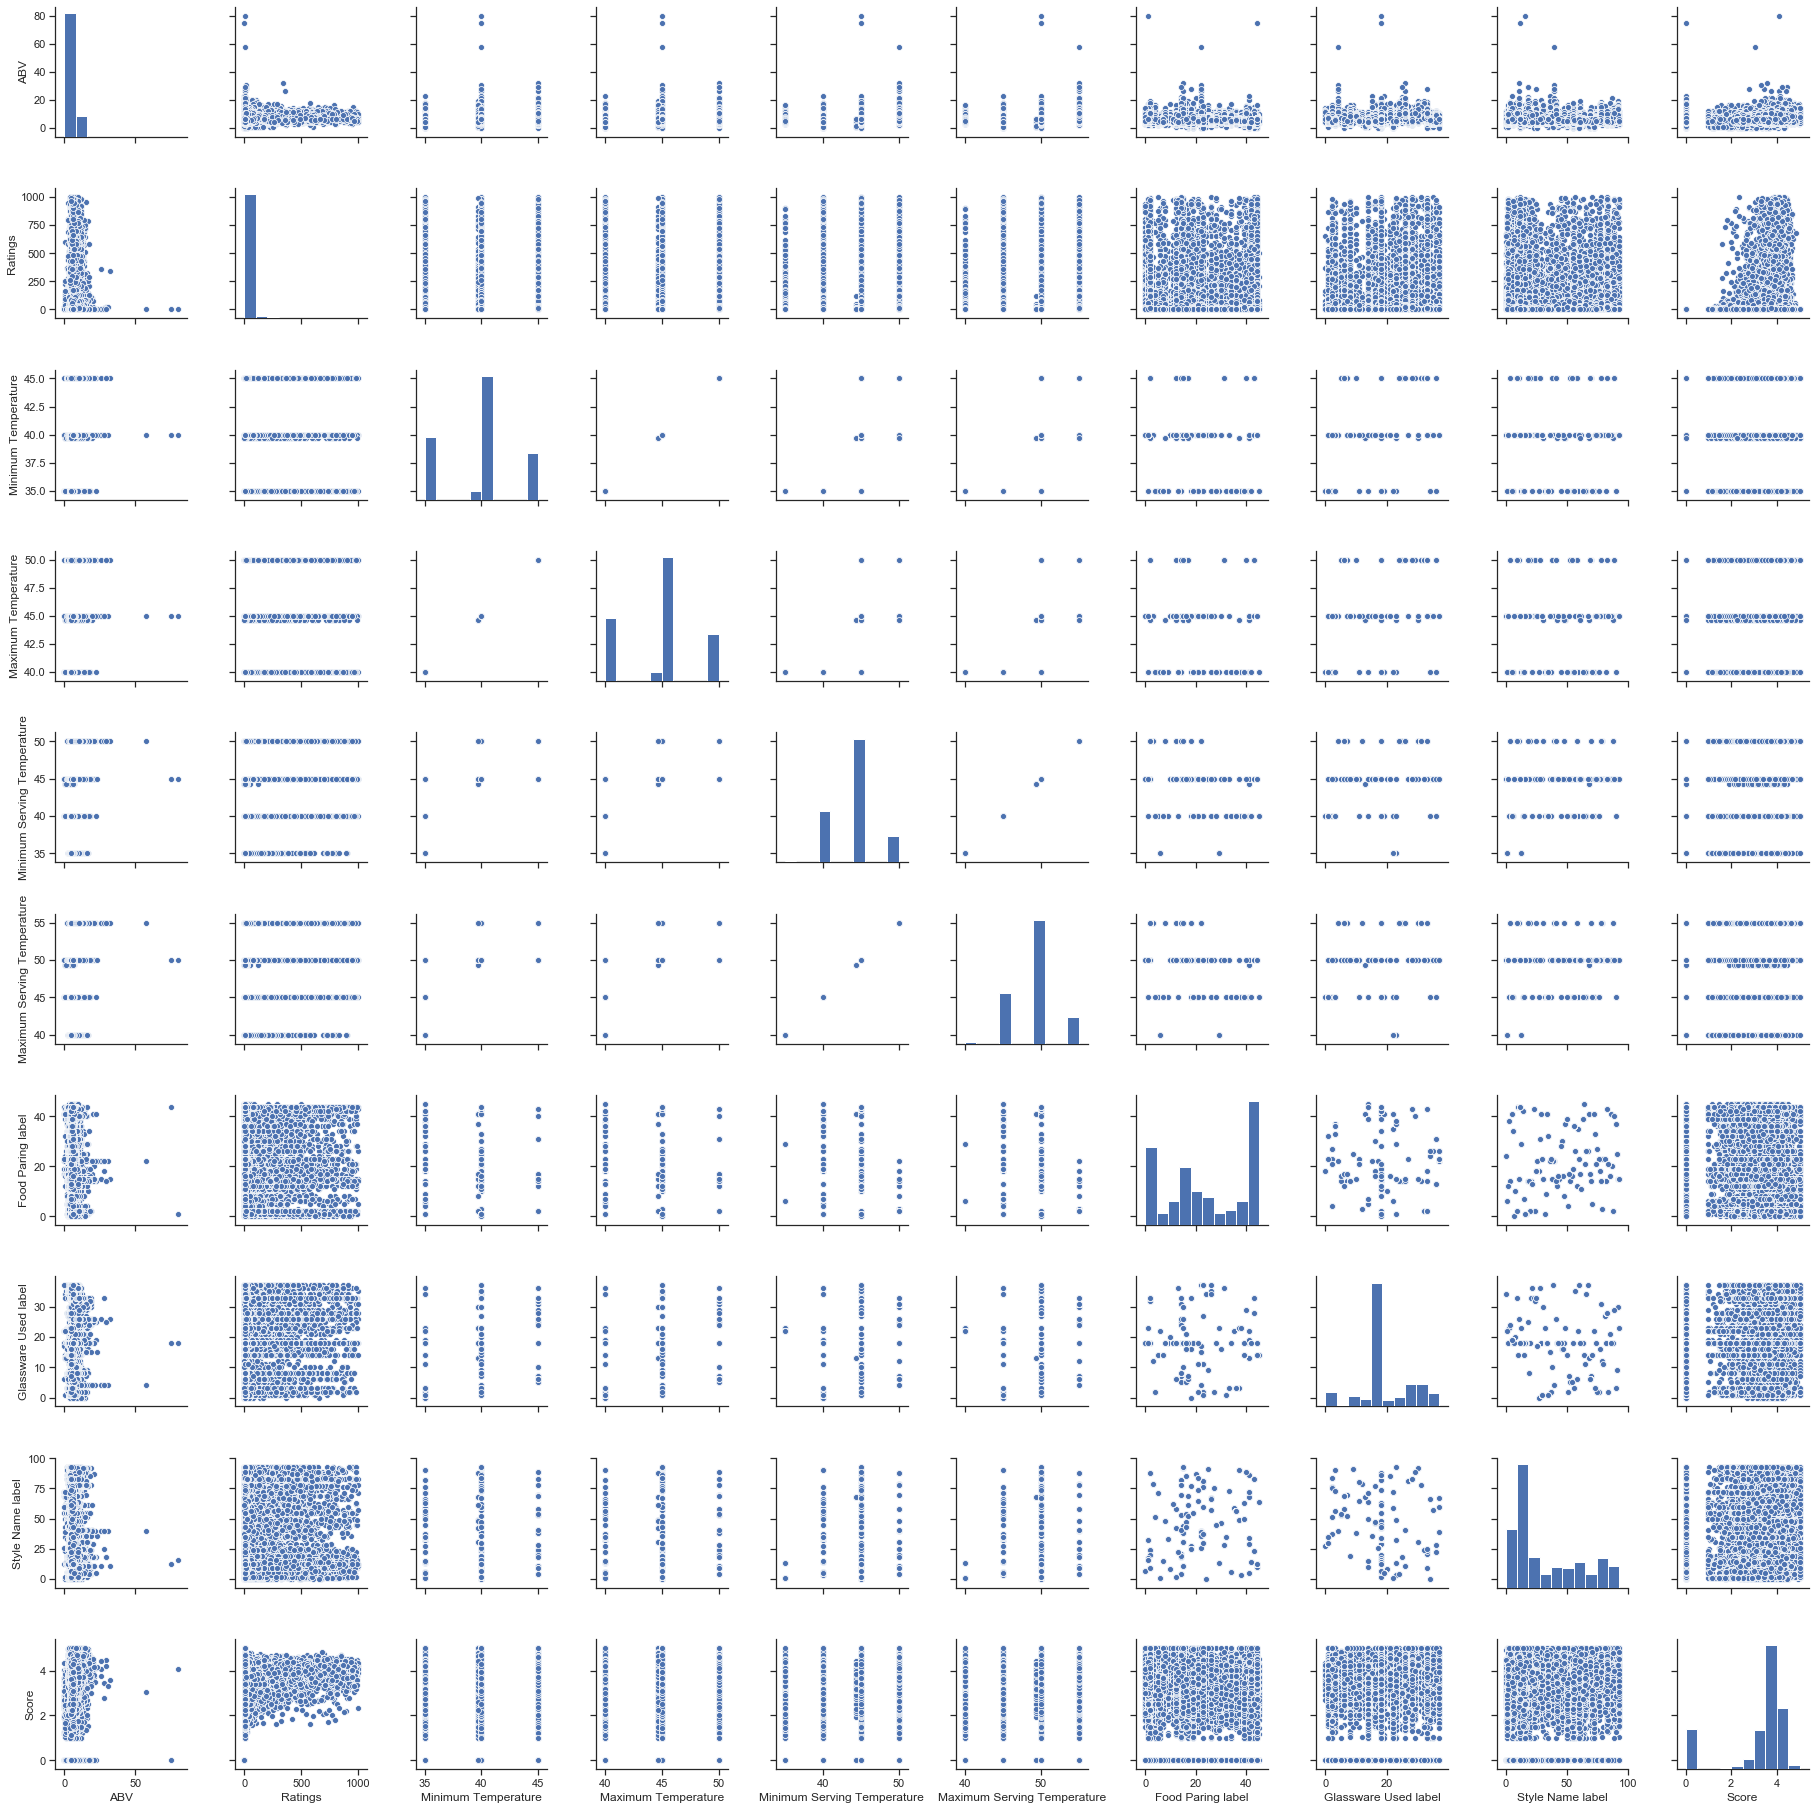

In [30]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(train1)

[Text(0.5, 0, 'ABV'),
 Text(1.5, 0, 'Ratings'),
 Text(2.5, 0, 'Minimum Temperature'),
 Text(3.5, 0, 'Maximum Temperature'),
 Text(4.5, 0, 'Minimum Serving Temperature'),
 Text(5.5, 0, 'Maximum Serving Temperature'),
 Text(6.5, 0, 'Food Paring label'),
 Text(7.5, 0, 'Glassware Used label'),
 Text(8.5, 0, 'Style Name label'),
 Text(9.5, 0, 'Score')]

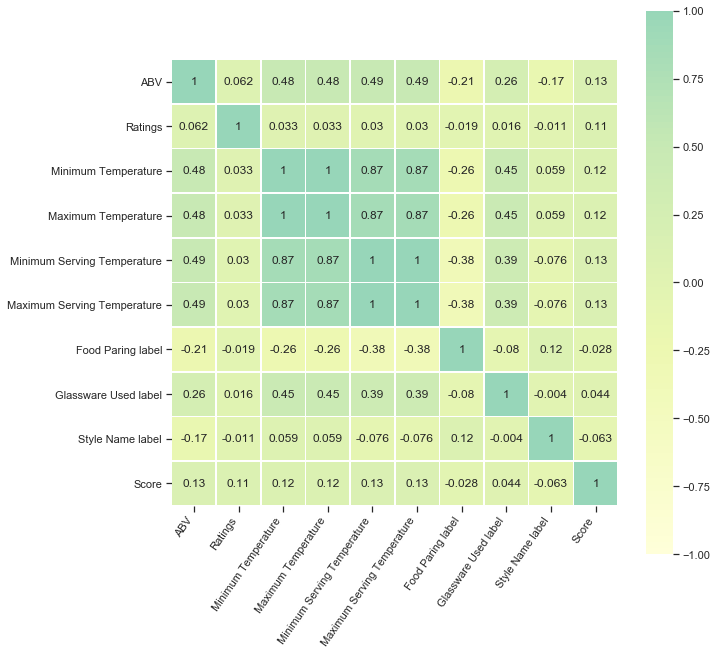

In [31]:
#A simple correlation plot usong seaborn. The below plot shows how the different variables correlate with each other

corr = train1.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1 , center=2,
    square=True,
    annot=True,
    linewidths=.5,
    cmap="YlGnBu" )

#Rotating labels on x axis
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=55,
    horizontalalignment='right'
)

## TEST SET

In [29]:
test.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.2,8803,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",34558,3,AmericanIPA,40-45,45-50,NaN
1,5.3,8558,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",86826,20,AmericanPorter,40-45,45-50,NaN
2,7.0,7519,"Cheese(earthyCamembert,Fontina)General(Aperitif)","Snifter,Tulip,OversizedWineGlass",17051,0,BelgianDarkAle,45-50,45-50,NaN
3,5.2,9852,"(LatinAmerican,German)Meat(Pork,Poultry)","Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",49156,2,ViennaLager,35-40,40-45,NaN
4,8.1,8991,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",162723,5,AmericanPorter,40-45,45-50,NaN


In [30]:
test.isnull().sum()

ABV                     1664
Brewing Company            0
Food Paring                0
Glassware Used             0
Beer Name                  0
Ratings                    0
Style Name                 0
Cellar Temperature       755
Serving Temperature       21
Score                  20628
dtype: int64

In [31]:
test[["Minimum Temperature", "Maximum Temperature"]] = test["Cellar Temperature"].str.split("-", expand=True, n=1).astype(float)
test[["Minimum Serving Temperature", "Maximum Serving Temperature"]] = test["Serving Temperature"].str.split("-", expand=True, n=1).astype(float)

In [32]:
avg_abv1 = test["ABV"].astype("float").mean(axis=0)
test["ABV"].replace(np.nan, avg_abv1, inplace=True)

avg_min_temp1 = test["Minimum Temperature"].astype("float").mean(axis=0)
test["Minimum Temperature"].replace(np.nan, avg_min_temp1, inplace=True)

avg_max_temp1 = test["Maximum Temperature"].astype("float").mean(axis=0)
test["Maximum Temperature"].replace(np.nan, avg_max_temp1, inplace=True)

avg_minserv_temp1 = test["Minimum Serving Temperature"].astype("float").mean(axis=0)
test["Minimum Serving Temperature"].replace(np.nan, avg_minserv_temp1, inplace=True)

avg_maxserv_temp1 = test["Maximum Serving Temperature"].astype("float").mean(axis=0)
test["Maximum Serving Temperature"].replace(np.nan, avg_maxserv_temp1, inplace=True)

In [33]:
freq = nltk.FreqDist(test['Food Paring'])
for key,value in freq.items():
    print(str(key)+'  :  '+str(value))

(Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Poultry,Fish,Shellfish,Salmon)  :  2842
(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Chocolate,Dessert)Meat(Beef,SmokedMeat,GrilledMeat)  :  1332
Cheese(earthyCamembert,Fontina)General(Aperitif)  :  73
(LatinAmerican,German)Meat(Pork,Poultry)  :  102
(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Game,GrilledMeat,Salmon)  :  1127
Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Chocolate,Digestive)Meat(Beef,SmokedMeat,Game,GrilledMeat)  :  570
Meat(Poultry,Fish,Shellfish)  :  272
Cheese(pepperyMontereyPepperJack,pungentGorgonzola,Limburger)General(Salad)  :  614
(Dessert)Meat(Poultry)  :  154
(Curried,Thai)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,pungentGorgonzola,Limburger)General(Salad,Aperitif)Meat(Poultry,Fish,Shellfish)  :  998
(Curried,Indian,Thai,Chinese,Japanese,PanAsian)Cheese(sharpBlue,Cheddar)  :  198
(Pan

In [34]:
test['Food Paring'] = test['Food Paring'].replace("(Curried,Thai)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Poultry,Fish,Shellfish,Salmon)" , "Thai, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Chocolate,Dessert)Meat(Beef,SmokedMeat,GrilledMeat)" , "Barbecue, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(earthyCamembert,Fontina)General(Aperitif)" , "Cheese, General Food")
test['Food Paring'] = test['Food Paring'].replace("(LatinAmerican,German)Meat(Pork,Poultry)" , "Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Game,GrilledMeat,Salmon)" , "Barbecue, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Chocolate,Digestive)Meat(Beef,SmokedMeat,Game,GrilledMeat)" , "Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("Meat(Poultry,Fish,Shellfish)" , "Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(pepperyMontereyPepperJack,pungentGorgonzola,Limburger)General(Salad)" , "Cheese, General Food")
test['Food Paring'] = test['Food Paring'].replace("(Dessert)Meat(Poultry)" , "Dessert, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Curried,Thai)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,pungentGorgonzola,Limburger)General(Salad,Aperitif)Meat(Poultry,Fish,Shellfish)" , "Thai, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Curried,Indian,Thai,Chinese,Japanese,PanAsian)Cheese(sharpBlue,Cheddar)" , "Indian, Thai, Chinese, Japanese, PanAsian, Cheese")
test['Food Paring'] = test['Food Paring'].replace("(PanAsian)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan,tangyBrick,Edam,Feta)General(Salad)Meat(Poultry)" , "PanAsian, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Indian,Mediterranean,MiddleEastern)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar)Meat(Fish,Shellfish)" , "Indian, Mediterranean, MiddleEastern, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(sharpBlue,Cheddar,pungentGorgonzola,Limburger)General(Digestive)" , "Cheese, General Food")
test['Food Paring'] = test['Food Paring'].replace("Cheese(sharpBlue,Cheddar,pungentGorgonzola,Limburger)General(Dessert,Digestive)" , "Cheese, General Food")
test['Food Paring'] = test['Food Paring'].replace("Cheese(sharpBlue,Cheddar)Meat(Beef,Poultry,Fish)" , "Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Salad)" , "Salad")
test['Food Paring'] = test['Food Paring'].replace("(Italian,German)Cheese(nuttyAsiago,Colby,Parmesan)Meat(Fish,Shellfish,Salmon)" , "Italian, German, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(pepperyMontereyPepperJack,tangyBrick,Edam,Feta)General(Salad)Meat(Poultry,Fish,Shellfish)" , "Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(German)" , "German")
test['Food Paring'] = test['Food Paring'].replace("(Thai)Cheese(tangyBrick,Edam,Feta)General(Salad,Aperitif)Meat(Fish)" , "Thai, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Curried,Indian)Cheese(nuttyAsiago,Colby,Parmesan,sharpBlue,Cheddar)Meat(Shellfish)" , "Indian, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swiss,earthyCamembert,Fontina)General(Chocolate,Dessert)Meat(Beef,Shellfish,SmokedMeat,Game,GrilledMeat)" , "Barbecue, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(pepperyMontereyPepperJack)General(Chocolate)Meat(GrilledMeat)" , "Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(German)Cheese(butteryBrie,Gouda,Havarti,Swiss,earthyCamembert,Fontina)General(Chocolate)Meat(Game)" , "German, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(German)Cheese(earthyCamembert,Fontina)Meat(SmokedMeat,Game,GrilledMeat)" , "German, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Dessert,Aperitif,Digestive)" , "Dessert")
test['Food Paring'] = test['Food Paring'].replace("(Indian,LatinAmerican,PanAsian)General(Aperitif)" , "Indian, LatinAmerican, PanAsian, General Food")
test['Food Paring'] = test['Food Paring'].replace("Cheese(butteryBrie,Gouda,Havarti,Swiss,pungentGorgonzola,Limburger)General(Chocolate)Meat(Beef)" , "Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(nuttyAsiago,Colby,Parmesan)General(Digestive)" , "Cheese, General Food")
test['Food Paring'] = test['Food Paring'].replace("(German)Cheese(butteryBrie,Gouda,Havarti,Swiss,sharpBlue,Cheddar)General(Salad,Aperitif)" , "German, Cheese, General Food")
test['Food Paring'] = test['Food Paring'].replace("(German)Cheese(tangyBrick,Edam,Feta)General(Salad)Meat(Poultry,Fish,Shellfish)" , "German, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Indian,MiddleEastern)Cheese(nuttyAsiago,Colby,Parmesan,tangyBrick,Edam,Feta)General(Salad,Aperitif)Meat(Fish,Shellfish)" , "Indian, MiddleEastern, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(German)Cheese(earthyCamembert,Fontina)General(Chocolate)Meat(Game)" , "German, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Italian,MiddleEastern)Cheese(pepperyMontereyPepperJack)General(Salad)Meat(Fish)" , "Italian, MiddleEastern, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(German)General(Salad)Meat(Pork,Fish,Shellfish)" , "German, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue)Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan)General(Chocolate)Meat(Beef)" , "Barbecue, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Aperitif,Digestive)Meat(Game,Salmon)" , "Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue,Italian)Cheese(earthyCamembert,Fontina)Meat(Pork,Poultry,Fish,Shellfish)" , "Barbecue, Italian, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue,Curried,Indian,LatinAmerican,Italian,Thai,Chinese,Japanese,PanAsian,Mediterranean,MiddleEastern)" , "Barbecue, Curried, Indian, LatinAmerican, Italian, Thai, Chinese, Japanese, PanAsian, Mediterranean, MiddleEastern")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar,tangyBrick,Edam,Feta)General(Salad)Meat(Pork,Poultry,Fish,Shellfish)" , "Barbecue, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(German)Meat(SmokedMeat,Game,GrilledMeat)" , "German, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Japanese,German)Cheese(pepperyMontereyPepperJack)General(Aperitif)Meat(Poultry,Fish)" , "Japanese, German, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue)Cheese(earthyCamembert,Fontina)Meat(Beef,SmokedMeat,Game,GrilledMeat)" , "Barbecue, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(butteryBrie,Gouda,Havarti,Swiss)Meat(SmokedMeat,Salmon)" , "Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Mediterranean)Cheese(sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Pork,Poultry)" , "Mediterranean, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("(German)Cheese(pepperyMontereyPepperJack)General(Salad)Meat(Pork)" , "German, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue,Curried,Indian,LatinAmerican,Chinese)Cheese(sharpBlue,Cheddar)General(Aperitif,Digestive)Meat(Shellfish,Game)" , "Barbecue, Curried, Indian, LatinAmerican, Chinese, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Curried,Thai,PanAsian)Cheese(sharpBlue,Cheddar)Meat(Game,GrilledMeat)" , "Curried, Thai, PanAsian, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("None,yet" , "None")
test['Food Paring'] = test['Food Paring'].replace("Cheese(tangyBrick,Edam,Feta)" , "Cheese")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue,LatinAmerican)Cheese(earthyCamembert,Fontina)General(Chocolate,Dessert)Meat(Beef,Shellfish,SmokedMeat,GrilledMeat)" , "Barbecue, LatinAmerican, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(sharpBlue,Cheddar,pungentGorgonzola,Limburger,tangyBrick,Edam,Feta)General(Salad)" , "Cheese, General Food")
test['Food Paring'] = test['Food Paring'].replace("(German)Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Salad)Meat(Pork,Fish,Shellfish)" , "German, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue,Indian,LatinAmerican,Thai,PanAsian)Cheese(pepperyMontereyPepperJack)Meat(Shellfish)" , "Barbecue, Indian, LatinAmerican, Thai, PanAsian, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("(German)General(Salad)Meat(Fish)" , "German, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(earthyCamembert,Fontina,nuttyAsiago,Colby,Parmesan)Meat(Pork,GrilledMeat)" , "Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("(LatinAmerican)Meat(Beef,Poultry)" , "LatinAmerican, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Curried,German)Cheese(nuttyAsiago,Colby,Parmesan)General(Digestive)Meat(Salmon)" , "German, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("Meat(Pork,Poultry)" , "Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue,LatinAmerican)Cheese(nuttyAsiago,Colby,Parmesan)General(Chocolate)Meat(Salmon)" , "Barbecue, LatinAmerican, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(German)General(Chocolate,Dessert)Meat(GrilledMeat)" , "German, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(earthyCamembert,Fontina)General(Chocolate)Meat(GrilledMeat)" , "Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Chocolate,Salad,Dessert,Aperitif)" , "Dessert")
test['Food Paring'] = test['Food Paring'].replace("(LatinAmerican,German)Meat(Beef,SmokedMeat,GrilledMeat)" , "LatinAmerican, German, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue)Cheese(sharpBlue,Cheddar,pungentGorgonzola,Limburger)Meat(Beef,GrilledMeat)" , "Barbecue, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(butteryBrie,Gouda,Havarti,Swiss,pungentGorgonzola,Limburger)General(Dessert,Digestive)Meat(Game)" , "Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(sharpBlue,Cheddar,tangyBrick,Edam,Feta)General(Aperitif,Digestive)" , "Cheese, General Food")
test['Food Paring'] = test['Food Paring'].replace("Cheese(butteryBrie,Gouda,Havarti,Swiss,sharpBlue,Cheddar)General(Digestive)Meat(Beef,SmokedMeat,Game)" , "Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue,LatinAmerican)General(Chocolate)Meat(SmokedMeat,GrilledMeat)" , "Barbecue, LatinAmerican, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Salad)Meat(Poultry,Game)" , "Salad, Meat")
test['Food Paring'] = test['Food Paring'].replace("(German)General(Salad)Meat(Poultry,Fish)" , "German, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(pungentGorgonzola,Limburger,tangyBrick,Edam,Feta)General(Digestive)Meat(Shellfish,Game,GrilledMeat)" , "Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar)Meat(Beef,SmokedMeat,Game,GrilledMeat,Salmon)" , "Barbecue, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("(German)Cheese(sharpBlue,Cheddar)General(Salad)Meat(Pork)" , "German, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Thai,Chinese,Japanese,PanAsian)Meat(Pork,Poultry,Fish,Shellfish)" , "Thai, Chinese, Japanese, PanAsian, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue,LatinAmerican)Cheese(pepperyMontereyPepperJack)Meat(Fish,SmokedMeat)" , "Barbecue, LatinAmerican, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(sharpBlue,Cheddar,pungentGorgonzola,Limburger)General(Aperitif,Digestive)" , "Cheese, General Food")
test['Food Paring'] = test['Food Paring'].replace("(Curried)Cheese(nuttyAsiago,Colby,Parmesan,pepperyMontereyPepperJack)Meat(Poultry,Fish)" , "Curried, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("(German)Cheese(butteryBrie,Gouda,Havarti,Swiss,sharpBlue,Cheddar)General(Dessert,Digestive)" , "German, Cheese, General Food")
test['Food Paring'] = test['Food Paring'].replace("Cheese(earthyCamembert,Fontina,sharpBlue,Cheddar)Meat(GrilledMeat)" , "Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("Cheese(butteryBrie,Gouda,Havarti,Swiss,sharpBlue,Cheddar,pungentGorgonzola,Limburger)" , "Cheese")
test['Food Paring'] = test['Food Paring'].replace("(Barbecue,German)Cheese(pepperyMontereyPepperJack,sharpBlue,Cheddar)Meat(Beef,SmokedMeat,Game,GrilledMeat,Salmon)" , "Barbecue, German, Cheese, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Dessert,Aperitif)" , "Dessert")
test['Food Paring'] = test['Food Paring'].replace("(German)Cheese(butteryBrie,Gouda,Havarti,Swiss)General(Aperitif)Meat(Pork,Poultry,Fish,Shellfish)" , "German, Cheese, General Food, Meat")
test['Food Paring'] = test['Food Paring'].replace("(Japanese)" , "Japanese")
test['Food Paring'] = test['Food Paring'].replace("(Aperitif)Meat(Fish,Shellfish,Salmon)" , "Meat")

In [35]:
test['Food Paring'].nunique()

44

In [36]:
freq = nltk.FreqDist(test['Glassware Used'])
for key,value in freq.items():
    print(str(key)+'  :  '+str(value))

PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)  :  10141
Snifter,Tulip,OversizedWineGlass  :  1681
Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)  :  521
PintGlass(orBecker,Nonic,Tumbler),Snifter,OversizedWineGlass  :  646
PilsenerGlass(orPokal)  :  640
Flute,Tulip,OversizedWineGlass  :  614
PintGlass(orBecker,Nonic,Tumbler)  :  433
PintGlass(orBecker,Nonic,Tumbler),Tulip,OversizedWineGlass  :  998
Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein),Stange(SlenderCylinder)  :  303
PintGlass(orBecker,Nonic,Tumbler),Snifter  :  147
PintGlass(orBecker,Nonic,Tumbler),PilsenerGlass(orPokal),Mug(orSeidel,Stein)  :  579
Mug(orSeidel,Stein)  :  102
PilsenerGlass(orPokal),Mug(orSeidel,Stein)  :  109
Stange(SlenderCylinder)  :  306
Goblet(orChalice)  :  142
PintGlass(orBecker,Nonic,Tumbler),Snifter,Mug(orSeidel,Stein)  :  101
PintGlass(orBecker,Nonic,Tumbler),Goblet(orChalice)  :  264
WeizenGlass  :  528
Tulip,OversizedWineGlass  :  70
Flute,PilsenerGlass(orPokal)  :  473
PintGlass(orBecke

In [37]:
test['Glassware Used'] = test['Glassware Used'].replace("PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein)" , "PintGlass, Mug")
test['Glassware Used'] = test['Glassware Used'].replace("Snifter,Tulip,OversizedWineGlass" , "Snifter, Tulip, OversizedWineGlass")
test['Glassware Used'] = test['Glassware Used'].replace("Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)" , "Flute, PilsenerGlass, Mug")
test['Glassware Used'] = test['Glassware Used'].replace("PintGlass(orBecker,Nonic,Tumbler),Snifter,OversizedWineGlass" , "PintGlass, Snifter, OversizedWineGlass")
test['Glassware Used'] = test['Glassware Used'].replace("PilsenerGlass(orPokal" , "PilsenerGlass")
test['Glassware Used'] = test['Glassware Used'].replace("Flute,Tulip,OversizedWineGlass" , "Flute, Tulip, OversizedWineGlass")
test['Glassware Used'] = test['Glassware Used'].replace("PintGlass(orBecker,Nonic,Tumbler)" , "PintGlass")
test['Glassware Used'] = test['Glassware Used'].replace("PintGlass(orBecker,Nonic,Tumbler),Tulip,OversizedWineGlass" , "PintGlass, Tulip, OversizedWineGlass") 
test['Glassware Used'] = test['Glassware Used'].replace("Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein),Stange(SlenderCylinder)" , "Flute, PilsenerGlass, Mug, Stange")
test['Glassware Used'] = test['Glassware Used'].replace("PintGlass(orBecker,Nonic,Tumbler),Snifter" , "PintGlass, Snifter")
test['Glassware Used'] = test['Glassware Used'].replace("PintGlass(orBecker,Nonic,Tumbler),PilsenerGlass(orPokal),Mug(orSeidel,Stein)" , "PintGlass, PilsenerGlass, Mug")
test['Glassware Used'] = test['Glassware Used'].replace("Mug(orSeidel,Stein)" , "Mug")
test['Glassware Used'] = test['Glassware Used'].replace("PilsenerGlass(orPokal),Mug(orSeidel,Stein)" , "PilsenerGlass, Mug")
test['Glassware Used'] = test['Glassware Used'].replace("Stange(SlenderCylinder)" , "Stange")
test['Glassware Used'] = test['Glassware Used'].replace("Goblet(orChalice)" , "Goblet")
test['Glassware Used'] = test['Glassware Used'].replace("PintGlass(orBecker,Nonic,Tumbler),Snifter,Mug(orSeidel,Stein)","PintGlass, Snifter, Mug") 
test['Glassware Used'] = test['Glassware Used'].replace("PintGlass(orBecker,Nonic,Tumbler),Goblet(orChalice)" , "PintGlass, Goblet")
test['Glassware Used'] = test['Glassware Used'].replace("WeizenGlass" , "WeizenGlass")
test['Glassware Used'] = test['Glassware Used'].replace("Tulip,OversizedWineGlass" , "Tulip, OversizedWineGlass")
test['Glassware Used'] = test['Glassware Used'].replace("Flute,PilsenerGlass(orPokal)" , "Flute, PilsenerGlass")
test['Glassware Used'] = test['Glassware Used'].replace("PintGlass(orBecker,Nonic,Tumbler),Snifter,Tulip" , "PintGlass, Snifter, Tulip")
test['Glassware Used'] = test['Glassware Used'].replace("Snifter,Goblet(orChalice)" , "Snifter, Goblet")
test['Glassware Used'] = test['Glassware Used'].replace("PintGlass(orBecker,Nonic,Tumbler),Stange(SlenderCylinder)" , "PintGlass, Stange")
test['Glassware Used'] = test['Glassware Used'].replace("Tulip,Goblet(orChalice),OversizedWineGlass" , "Tulip, Goblet, OversizedWineGlass")
test['Glassware Used'] = test['Glassware Used'].replace("PintGlass(orBecker,Nonic,Tumbler),PilsenerGlass(orPokal)" , "PintGlass, PilsenerGlass")
test['Glassware Used'] = test['Glassware Used'].replace("Stange(SlenderCylinder),WeizenGlass" , "Stange, WeizenGlass")
test['Glassware Used'] = test['Glassware Used'].replace("PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein),WeizenGlass" , "PintGlass, Mug, WeizenGlass")
test['Glassware Used'] = test['Glassware Used'].replace("PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel,Stein),OversizedWineGlass" , "PintGlass, Mug, OversizedWineGlass")
test['Glassware Used'] = test['Glassware Used'].replace("Flute,WeizenGlass" , "Flute, WeizenGlass")
test['Glassware Used'] = test['Glassware Used'].replace("Flute,Snifter,Tulip" , "Flute, Snifter, Tulip")
test['Glassware Used'] = test['Glassware Used'].replace("Flute,Snifter,Tulip,Stange(SlenderCylinder)" , "Flute, Snifter, Tulip, Stange")
test['Glassware Used'] = test['Glassware Used'].replace("Snifter,Tulip,Goblet(orChalice),OversizedWineGlass" , "Snifter, Tulip, Goblet, OversizedWineGlass")
test['Glassware Used'] = test['Glassware Used'].replace("Snifter,OversizedWineGlass" , "Snifter, OversizedWineGlass")
test['Glassware Used'] = test['Glassware Used'].replace("Snifter,Tulip,Goblet(orChalice)" , "Snifter, Tulip, Goblet")
test['Glassware Used'] = test['Glassware Used'].replace("None,yet" , "None")
test['Glassware Used'] = test['Glassware Used'].replace("Flute,Stange(SlenderCylinder)" , "Flute,Stange")
test['Glassware Used'] = test['Glassware Used'].replace("Flute,Snifter,OversizedWineGlass" , "Flute, Snifter, OversizedWineGlass")
test['Glassware Used'] = test['Glassware Used'].replace("Mug(orSeidel,Stein),Stange(SlenderCylinder)" , "Mug, Stange")
test['Glassware Used'] = test['Glassware Used'].replace("Flute" , "Flute")


In [38]:
test['Glassware Used'].nunique()

39

In [39]:
test.dtypes

ABV                            float64
Brewing Company                  int64
Food Paring                     object
Glassware Used                  object
Beer Name                        int64
Ratings                         object
Style Name                      object
Cellar Temperature              object
Serving Temperature             object
Score                          float64
Minimum Temperature            float64
Maximum Temperature            float64
Minimum Serving Temperature    float64
Maximum Serving Temperature    float64
dtype: object

In [40]:
test['Food Paring label']= label_encoder.fit_transform(test['Food Paring']) 
test['Glassware Used label']= label_encoder.fit_transform(test['Glassware Used']) 
test['Style Name label']= label_encoder.fit_transform(test['Style Name']) 

In [41]:
test['Ratings'] = pd.to_numeric(test['Ratings'],errors='coerce')
test['Beer Name'] = test['Beer Name'].astype(float)
test['Brewing Company'] = test['Brewing Company'].astype(float)

In [42]:
test.isnull().sum()

ABV                                0
Brewing Company                    0
Food Paring                        0
Glassware Used                     0
Beer Name                          0
Ratings                          139
Style Name                         0
Cellar Temperature               755
Serving Temperature               21
Score                          20628
Minimum Temperature                0
Maximum Temperature                0
Minimum Serving Temperature        0
Maximum Serving Temperature        0
Food Paring label                  0
Glassware Used label               0
Style Name label                   0
dtype: int64

In [43]:
test_avg_ratings = test['Ratings'].astype(float).mean()
test['Ratings'].replace(np.nan, test_avg_ratings, inplace=True)

In [44]:
test.isnull().sum()

ABV                                0
Brewing Company                    0
Food Paring                        0
Glassware Used                     0
Beer Name                          0
Ratings                            0
Style Name                         0
Cellar Temperature               755
Serving Temperature               21
Score                          20628
Minimum Temperature                0
Maximum Temperature                0
Minimum Serving Temperature        0
Maximum Serving Temperature        0
Food Paring label                  0
Glassware Used label               0
Style Name label                   0
dtype: int64

In [45]:
test.columns

Index(['ABV', 'Brewing Company', 'Food Paring', 'Glassware Used', 'Beer Name',
       'Ratings', 'Style Name', 'Cellar Temperature', 'Serving Temperature',
       'Score', 'Minimum Temperature', 'Maximum Temperature',
       'Minimum Serving Temperature', 'Maximum Serving Temperature',
       'Food Paring label', 'Glassware Used label', 'Style Name label'],
      dtype='object')

In [46]:
test1 = test[['ABV', 'Ratings', 'Minimum Temperature', 'Maximum Temperature','Minimum Serving Temperature', 'Maximum Serving Temperature', 'Food Paring label', 'Glassware Used label', 'Style Name label']]

In [47]:
test1.isnull().sum()

ABV                            0
Ratings                        0
Minimum Temperature            0
Maximum Temperature            0
Minimum Serving Temperature    0
Maximum Serving Temperature    0
Food Paring label              0
Glassware Used label           0
Style Name label               0
dtype: int64

## Data Pre-Processing

In [48]:
x = train1.iloc[:,:-1]
y = train1.iloc[:,-1]
print(x.columns)


Index(['ABV', 'Ratings', 'Minimum Temperature', 'Maximum Temperature',
       'Minimum Serving Temperature', 'Maximum Serving Temperature',
       'Food Paring label', 'Glassware Used label', 'Style Name label'],
      dtype='object')


In [49]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit(x).transform(x)
x[:3]

array([[ 0.07935058,  0.05577746,  0.1032748 ,  0.1032748 ,  0.21735148,
         0.21735148,  1.26116775, -0.23685715, -0.7597163 ],
       [-0.46774665, -0.24468359, -1.39315569, -1.39315569, -1.38197524,
        -1.38197524,  1.13575313, -0.23685715, -0.68790336],
       [ 0.95470614, -0.21606825, -1.39315569, -1.39315569, -1.38197524,
        -1.38197524,  0.94763119, -0.23685715,  1.0715136 ]])

### Regression

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred = reg.predict(x_test)
print(y_pred)

[3.19830794 3.30957503 3.07962486 ... 3.16934654 3.23573775 3.25829787]


In [53]:
# Calculating score from Root Mean Log Squared Error
def rmlse(y_test, y_pred):
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    score = 1 - error
    return score


In [54]:
print("\n----------------------------\nRMLSE Score = ", rmlse(y_test, y_pred))


----------------------------
RMLSE Score =  0.7615472587302806


### SVR

In [55]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')

In [56]:
# Training the regressor with training data
svr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [57]:
y_pred2 = svr.predict(x_test)
print(y_pred2)

[3.63264068 3.79316237 3.64473313 ... 3.70577344 3.65590063 3.68563509]


In [58]:
print("----------------------------\nRMLSE Score = ", rmlse(y_test, y_pred2))

----------------------------
RMLSE Score =  0.7502329428531098


In [60]:
pd.DataFrame({'Score' : y_pred}).to_excel("C:\\Users\\Moaz\\Desktop\\moaz\\Jupyter Python NB\\Machine Hack\\beer_score.xlsx")